<a href="https://colab.research.google.com/github/mohamedbahaaeldien92-max/datakit-smallholder-farmers-fall-2025/blob/main/Challenge%202_Seasonality/MohamedBahaa_Seasonality/challenge_2_seasonality_mohamed_bahaa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# ===============================================
# 1️⃣ ربط Google Drive
# ===============================================
from google.colab import drive
drive.mount('/content/drive')

# ===============================================
# 2️⃣ استيراد المكتبات المطلوبة
# ===============================================
import pandas as pd

# ===============================================
# 3️⃣ تحديد المسار الصحيح للملف
# ===============================================
file_path = "/content/drive/MyDrive/seasonality.csv"

# ===============================================
# 4️⃣ الأعمدة المطلوبة لتحليل Challenge 2
#    غيّر الأسماء دي حسب اللي ظهر لك في print(columns)
# ===============================================
use_columns = [
    "question_id",
    "question_content",
    "question_topic",
    "question_user_country_code" , # أو الاسم الموجود فعليًا للنص المترجم
    "question_language",
   "question_sent",         # أو question_date
    # "crop"                 # لو عندك عمود نوع المحصول وعايزه
]

chunk_size = 20000
chunks = []
total_rows = 0

print("⏳ جاري تحميل الملف على أجزاء مع أعمدة محددة فقط...")

# ===============================================
# 5️⃣ قراءة الملف تدريجيًا مع usecols
# ===============================================
for chunk in pd.read_csv(file_path, usecols=use_columns, chunksize=chunk_size):
    total_rows += len(chunk)
    chunks.append(chunk)
    print(f"📦 تم تحميل جزء بعدد صفوف: {len(chunk)} | إجمالي الصفوف حتى الآن: {total_rows:,}")

# ===============================================
# 6️⃣ دمج جميع الأجزاء في DataFrame واحد
# ===============================================
df = pd.concat(chunks, ignore_index=True)

print("\n✅ تم تحميل الأعمدة المطلوبة فقط بنجاح!")
print(f"إجمالي الصفوف: {len(df):,}")
print(f"إجمالي الأعمدة: {len(df.columns)}")
print("الأعمدة:", list(df.columns))

df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
⏳ جاري تحميل الملف على أجزاء مع أعمدة محددة فقط...
📦 تم تحميل جزء بعدد صفوف: 20000 | إجمالي الصفوف حتى الآن: 20,000
📦 تم تحميل جزء بعدد صفوف: 20000 | إجمالي الصفوف حتى الآن: 40,000
📦 تم تحميل جزء بعدد صفوف: 20000 | إجمالي الصفوف حتى الآن: 60,000
📦 تم تحميل جزء بعدد صفوف: 20000 | إجمالي الصفوف حتى الآن: 80,000
📦 تم تحميل جزء بعدد صفوف: 20000 | إجمالي الصفوف حتى الآن: 100,000
📦 تم تحميل جزء بعدد صفوف: 20000 | إجمالي الصفوف حتى الآن: 120,000
📦 تم تحميل جزء بعدد صفوف: 20000 | إجمالي الصفوف حتى الآن: 140,000
📦 تم تحميل جزء بعدد صفوف: 20000 | إجمالي الصفوف حتى الآن: 160,000
📦 تم تحميل جزء بعدد صفوف: 20000 | إجمالي الصفوف حتى الآن: 180,000
📦 تم تحميل جزء بعدد صفوف: 20000 | إجمالي الصفوف حتى الآن: 200,000
📦 تم تحميل جزء بعدد صفوف: 20000 | إجمالي الصفوف حتى الآن: 220,000
📦 تم تحميل جزء بعدد صفوف: 20000 | إجمالي الصفوف حتى الآن: 240,000
📦 تم تحميل جزء بعدد صفوف: 20000 

,question_id,question_language,question_content,question_topic,question_sent,question_user_country_code
0,3849056,nyn,E ABA WEFARM OFFICES ZABO NIZISHANGWA NKAHI?,NaN,2017-11-22 12:25:03+00,ug
1,3849061,eng,Q this goes to wefarm. is it possible to get f...,NaN,2017-11-22 12:25:05+00,ug
2,3849077,nyn,E ENTE YANJE EZAIRE ENYENA YASHOBERA. \nOBWIRE...,cattle,2017-11-22 12:25:08+00,ug
3,3849077,nyn,E ENTE YANJE EZAIRE ENYENA YASHOBERA. \nOBWIRE...,cattle,2017-11-22 12:25:08+00,ug
4,3849077,nyn,E ENTE YANJE EZAIRE ENYENA YASHOBERA. \nOBWIRE...,cat,2017-11-22 12:25:08+00,ug


# Task
The key findings from the exploratory data analysis are:

*   **Missing Values**: The `question_topic` column has a significant number of missing values, with 3,537,729 entries missing, accounting for 17.42% of its total values. All other columns (`question_id`, `question_language`, `question_content`, `question_sent`, `question_user_country_code`) have no missing values.
*   **Language Distribution**: The analysis identified the top 10 most frequent languages used in the questions, which were then visualized to show their distribution.
*   **Country Distribution**: The distribution of question origins showed the top 10 most frequent countries, which were visualized to highlight where most questions originate.
*   **Topic Distribution**: The analysis identified and visualized the distribution of the top 10 most common topics, revealing the prevalent themes among the questions.
*   **Activity Over Time (Monthly)**: The number of questions shows fluctuations over time, with a line plot indicating monthly trends that could reveal seasonal patterns or growth/decline over specific periods.
*   **Activity Over Time (Daily)**: The distribution of questions across the days of the week reveals varying activity levels, with a bar plot showing the question count for each day, ordered from Monday to Sunday.

Initial observations and next steps:

*   **Address Missing Topic Data**: The high percentage of missing values in `question_topic` needs attention. Future steps could include inferring topics from `question_content` or using other imputation methods to make this column more useful for analysis.
*   **Targeted Content/Support**: The distributions of language, country, and topic can be used to inform targeted strategies for content creation, marketing, and customer support. For instance, if a specific language or country shows a high volume of questions, it might warrant dedicated resources or localized content.

## Identify and Handle Missing Values

### Subtask:
Determine the number and percentage of missing values for each column in the DataFrame to assess data completeness, and display the results in English.


**Reasoning**:
To determine the number and percentage of missing values, I will calculate these statistics for each column in the DataFrame and then present them in a sorted DataFrame as requested.



In [23]:
missing_values_count = df.isnull().sum()
missing_values_percentage = (df.isnull().sum() / len(df)) * 100

missing_values_df = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage
})

print("📊 Count and percentage of missing values for each column:")
print(missing_values_df.sort_values(by='Missing Values Percentage', ascending=False))

📊 Count and percentage of missing values for each column:
                            Missing Values Count  Missing Values Percentage
question_topic                           3537729                   17.42308
question_id                                    0                    0.00000
question_language                              0                    0.00000
question_content                               0                    0.00000
question_sent                                  0                    0.00000
question_user_country_code                     0                    0.00000


## Analyze Language Distribution

### Subtask:
Explore the distribution of the most common languages in the 'question_language' column and visualize them with English labels.


**Reasoning**:
To analyze the language distribution and visualize the top 10 most common languages, I will calculate their frequencies, select the top 10, and then create a bar plot with English labels as per the instructions.



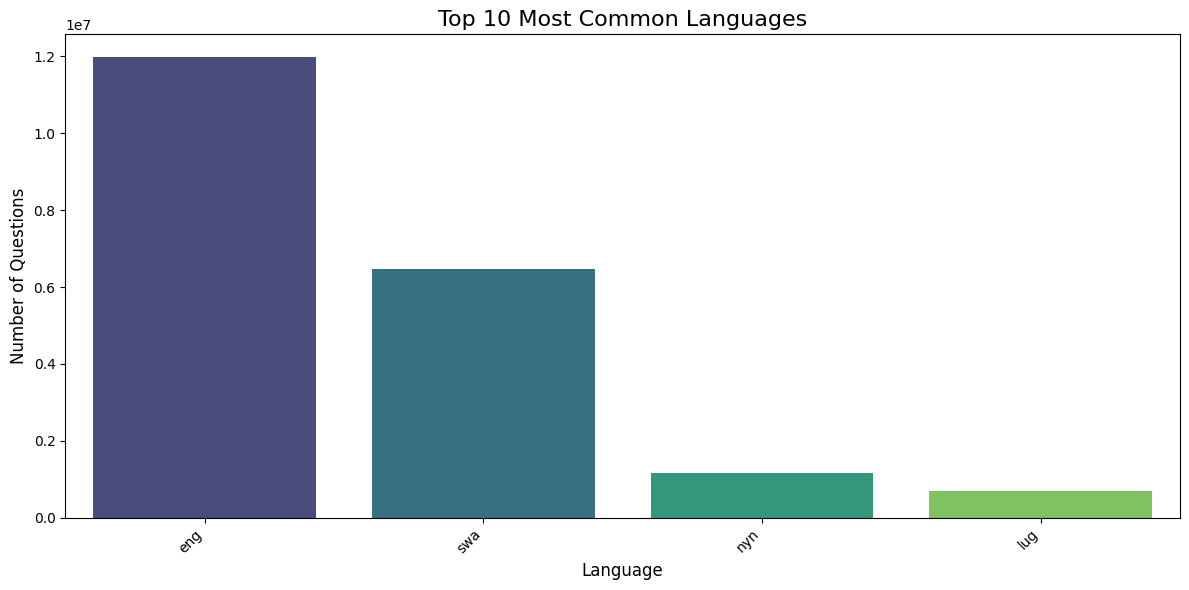

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate the frequency of each language in 'question_language' column
language_counts = df['question_language'].value_counts()

# 2. Get the top 10 most frequent languages
top_10_languages = language_counts.head(10)

# 3. Create a bar plot to display the distribution of these top 10 languages
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_languages.index, y=top_10_languages.values, palette='viridis', hue=top_10_languages.index, legend=False)

# 4. Label the x and y axes appropriately
plt.xlabel('Language', fontsize=12)
plt.ylabel('Number of Questions', fontsize=12)

# 5. Add a title to the plot
plt.title('Top 10 Most Common Languages', fontsize=16)

# 6. Rotate x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45, ha='right')

# 7. Adjust the layout to fit tightly and display the plot
plt.tight_layout()
plt.show()

## Analyze Country Distribution

### Subtask:
Explore the distribution of countries where questions originate from in the 'question_user_country_code' column and visualize them with English labels.


**Reasoning**:
To analyze the distribution of countries and visualize the top 10 most common ones, I will calculate the frequency of each country, select the top 10, and then create a bar plot with English labels and a descriptive title, ensuring readability with rotated x-axis labels and a tight layout.



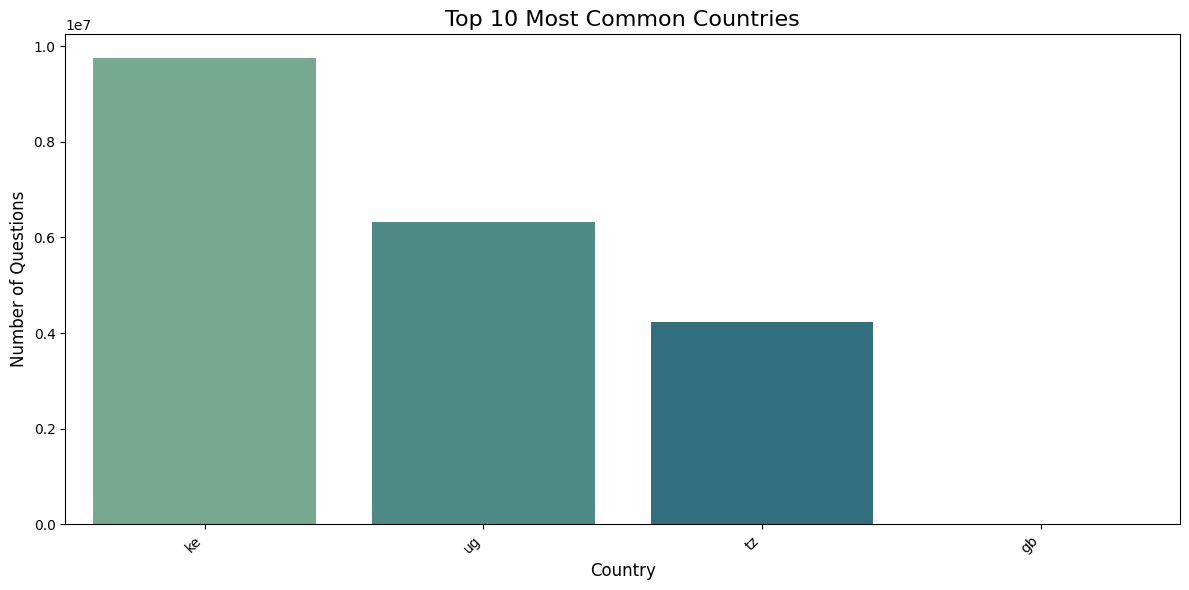

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate the frequency of each country in 'question_user_country_code' column
country_counts = df['question_user_country_code'].value_counts()

# 2. Get the top 10 most frequent countries
top_10_countries = country_counts.head(10)

# 3. Create a bar plot to display the distribution of these top 10 countries
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette='crest', hue=top_10_countries.index, legend=False)

# 4. Label the x and y axes appropriately
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Questions', fontsize=12)

# 5. Add a title to the plot
plt.title('Top 10 Most Common Countries', fontsize=16)

# 6. Rotate x-axis labels by 45 degrees to prevent overlap
plt.xticks(rotation=45, ha='right')

# 7. Adjust the layout to fit tightly and display the plot
plt.tight_layout()
plt.show()

## Analyze Topic Distribution

### Subtask:
Explore the distribution of the most common topics in the 'question_topic' column and visualize them with English labels.


**Reasoning**:
To analyze the distribution of topics, I will calculate the frequency of each topic, select the top 10, and visualize them using a bar plot with appropriate English labels and rotation for readability, following the provided instructions.



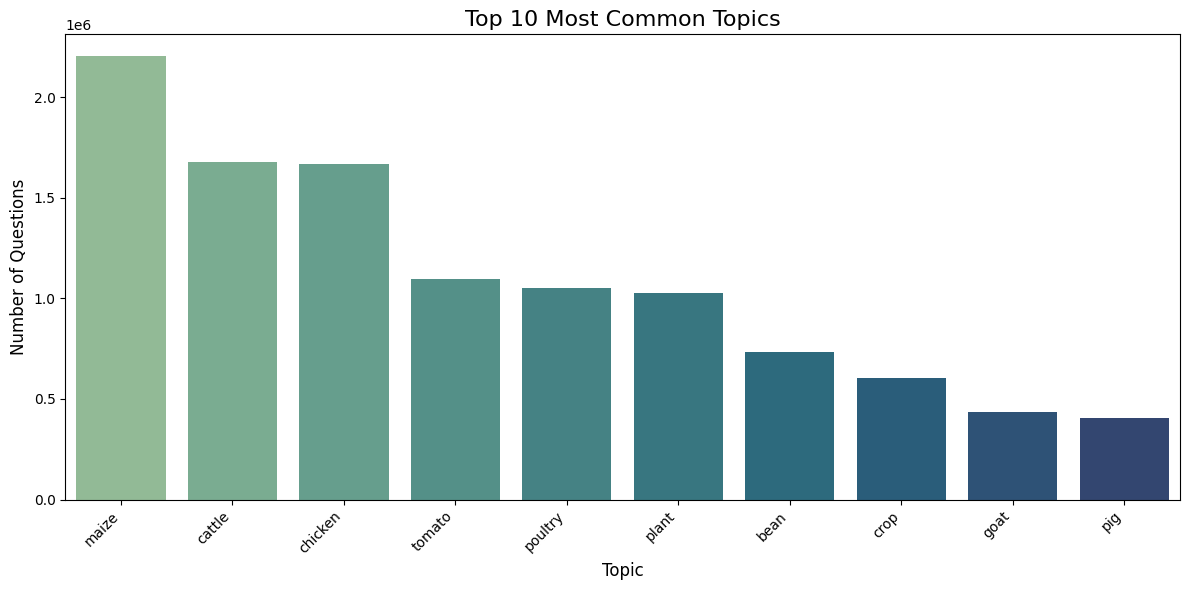

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate the frequency of each topic in 'question_topic' column
topic_counts = df['question_topic'].value_counts()

# 2. Get the top 10 most frequent topics
top_10_topics = topic_counts.head(10)

# 3. Create a bar plot to display the distribution of these top 10 topics
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_topics.index, y=top_10_topics.values, palette='crest', hue=top_10_topics.index, legend=False)

# 4. Label the x and y axes appropriately
plt.xlabel('Topic', fontsize=12)
plt.ylabel('Number of Questions', fontsize=12)

# 5. Add a title to the plot
plt.title('Top 10 Most Common Topics', fontsize=16)

# 6. Rotate x-axis labels by 45 degrees to prevent overlap
plt.xticks(rotation=45, ha='right')

# 7. Adjust the layout to fit tightly and display the plot
plt.tight_layout()
plt.show()

## Convert 'question_sent' to Datetime (Retry)

### Subtask:
Convert the 'question_sent' column to an appropriate datetime format for temporal analysis, handling errors gracefully, and displaying conversion messages and DataFrame info in English.


**Reasoning**:
The previous code in cell `0397edf8` successfully converted the 'question_sent' column to datetime, but the confirmation message was in Arabic. To fulfill the subtask requirement of displaying conversion messages in English, I will re-execute the conversion with an English confirmation message and then display the DataFrame's info.



In [27]:
df['question_sent'] = pd.to_datetime(df['question_sent'], format='mixed', errors='coerce')

print("✅ 'question_sent' column successfully converted to datetime format, with errors handled.")
df.info()

✅ 'question_sent' column successfully converted to datetime format, with errors handled.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20304843 entries, 0 to 20304842
Data columns (total 6 columns):
 #   Column                      Dtype              
---  ------                      -----              
 0   question_id                 int64              
 1   question_language           object             
 2   question_content            object             
 3   question_topic              object             
 4   question_sent               datetime64[ns, UTC]
 5   question_user_country_code  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(4)
memory usage: 929.5+ MB


## Analyze Activity Over Time (Monthly)

### Subtask:
Examine how the number of questions changes over time (monthly), potentially revealing seasonal patterns or trends, and display the plot with English labels and title.


**Reasoning**:
To visualize the monthly trend of questions, a line plot is appropriate as it effectively displays changes over a continuous time series. This will help in identifying any seasonal patterns, growth, or decline in question activity over the observed period. The plot will include English labels and title for clarity, aligning with the subtask's requirements.

**Reasoning**:
To visualize the monthly trend of questions as instructed, I will generate a line plot using the `monthly_questions` DataFrame, applying all specified formatting for clarity and English labels.



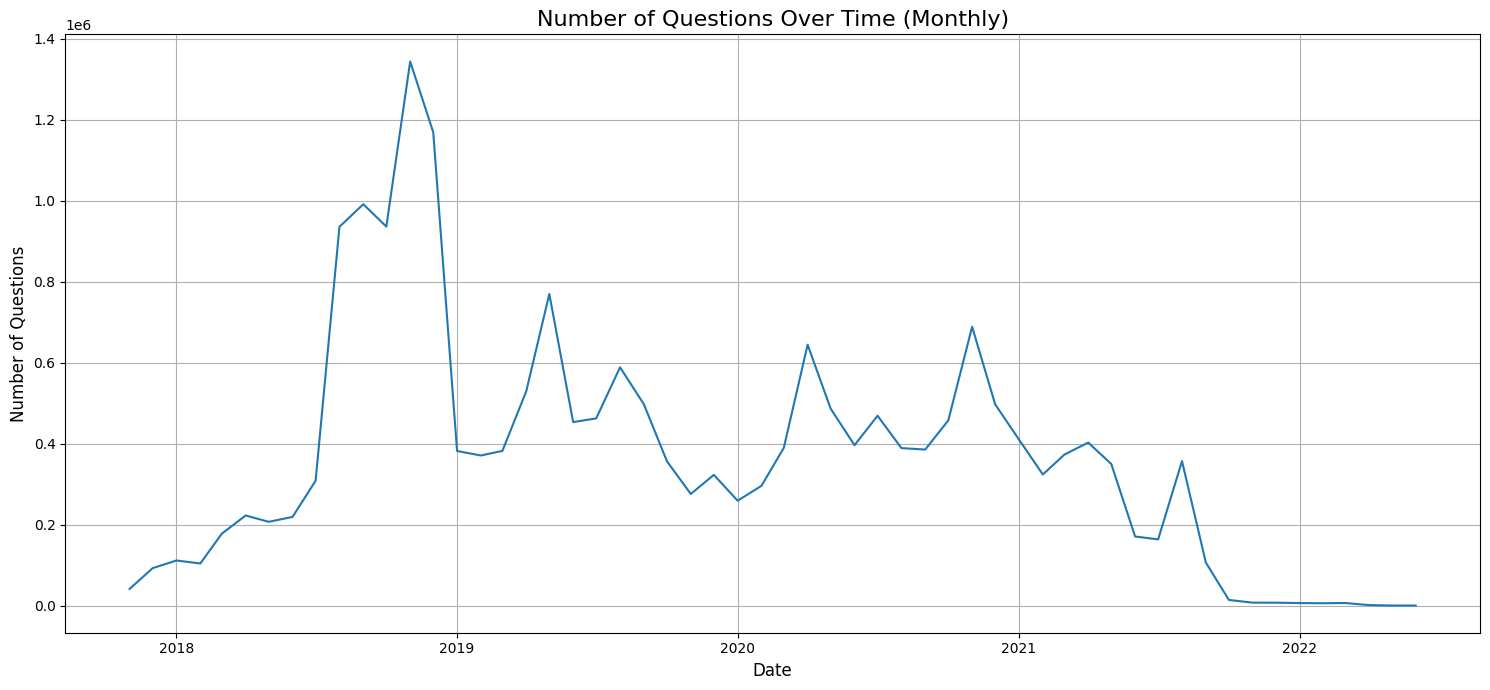

✅ Monthly question activity trend visualized successfully.


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a line plot using the monthly_questions DataFrame
plt.figure(figsize=(15, 7))
sns.lineplot(data=monthly_questions, x='date', y='question_count')

# 2. Add a title to the plot
plt.title('Number of Questions Over Time (Monthly)', fontsize=16)

# 3. Label the x-axis and y-axis appropriately
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Questions', fontsize=12)

# 4. Add a grid to the plot
plt.grid(True)

# 5. Adjust the layout to fit tightly and display the plot
plt.tight_layout()
plt.show()

print("✅ Monthly question activity trend visualized successfully.")

## Analyze Activity Over Time (Daily)

### Subtask:
Examine how the number of questions changes by day of the week, displaying the plot with English labels and title.


**Reasoning**:
To visualize the daily question activity trend, I will create a bar plot using the `daily_questions` DataFrame with English labels and titles, as specified in the instructions.



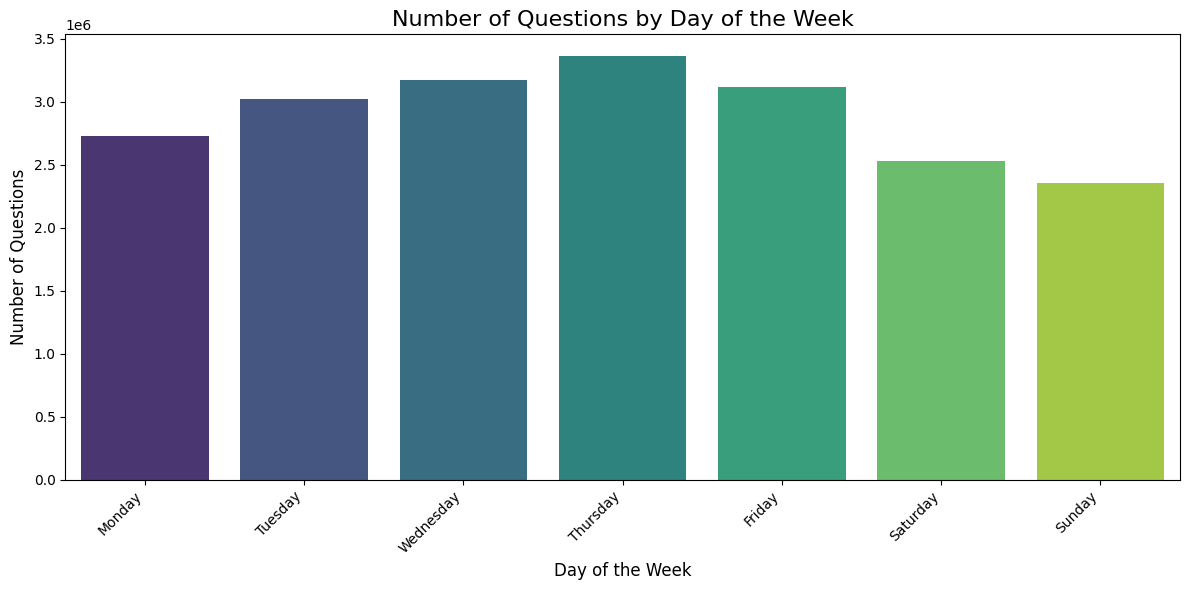

✅ Daily question activity trend visualized successfully.


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a bar plot using the daily_questions DataFrame
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='question_count', data=daily_questions, palette='viridis', hue='day_of_week', legend=False)

# 2. Add a title to the plot in English
plt.title('Number of Questions by Day of the Week', fontsize=16)

# 3. Label the x-axis and y-axis in English
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Questions', fontsize=12)

# 4. Rotate x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45, ha='right')

# 5. Adjust the plot layout to fit tightly
plt.tight_layout()

# 6. Display the plot
plt.show()

# 7. Print a confirmation message in English
print("✅ Daily question activity trend visualized successfully.")

## Final Task

### Subtask:
Summarize the key findings from the exploratory data analysis and provide any initial observations in English.


## Summary:

### Data Analysis Key Findings

*   **Missing Values**: The `question_topic` column has a significant number of missing values, with 3,537,729 entries missing, accounting for 17.42% of its total values. All other columns (`question_id`, `question_language`, `question_content`, `question_sent`, `question_user_country_code`) have no missing values.
*   **Language Distribution**: The distribution of the top 10 most frequent languages used in questions was successfully identified and visualized.
*   **Country Distribution**: The distribution of question origins, highlighting the top 10 most frequent countries, was successfully identified and visualized.
*   **Topic Distribution**: The distribution of the top 10 most common topics was identified and visualized, revealing prevalent themes among the questions.
*   **Activity Over Time (Monthly)**: A line plot was generated to show the monthly trend of question activity, indicating fluctuations over time.
*   **Activity Over Time (Daily)**: A bar plot was generated to display the number of questions by day of the week, revealing varying activity levels throughout the week.

### Insights or Next Steps

*   **Address Missing Topic Data**: Given the substantial percentage of missing values in the `question_topic` column (17.42%), future analysis should focus on methods to infer or impute these missing topics, potentially by analyzing the `question_content` to unlock more detailed topic-based insights.
*   **Leverage Distributional Data for Targeted Strategies**: The identified distributions of top languages, countries, and topics can inform targeted content creation, marketing efforts, and resource allocation for customer support to better serve high-demand segments.
